In [1]:
import numpy as np
import torch
from MCMC.BayesQuantile import BQR
import matplotlib.pyplot as plt
from Optimization.CD import SQR
from scipy.linalg import toeplitz

In [2]:
N=500
P=1000
Corr=0.5**toeplitz(np.arange(0,P),np.arange(0,P))
beta=np.zeros((P,1))
beta[0]=3
beta[1]=1.5
beta[4]=2
beta[9]=1
beta[12]=1
beta[18]=0.5
beta[25]=-0.5
beta[30]=2.0
beta[45]=-1.2
beta[50]=-1
Z=np.random.binomial(1,0.8,(N,1))
X=np.random.multivariate_normal(np.zeros(P), Corr, N)
sigma1=1
sigma2=6
Y=X@beta+(Z*sigma1+(1-Z)*sigma2)*np.random.randn(N,1)

In [3]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
# Simulation
beta_sample=BQR(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),1,1,1,Q=0.5)

100%|██████████| 19999/19999 [01:20<00:00, 248.52it/s]


In [5]:
# Optimization
beta_estimator,beta_path=SQR(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),Q=0.5,C=0.5,s=1,path=True)

In [6]:
beta_mean=beta_sample.mean(axis=0)

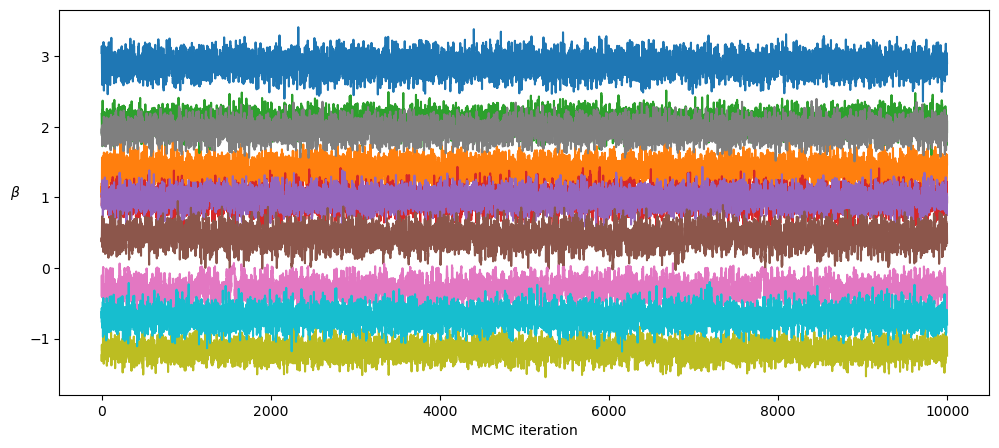

In [8]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_sample[:,[0, 1, 4, 9,12,18,25,30,45,50]].cpu().numpy())
plt.xlabel('MCMC iteration')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()

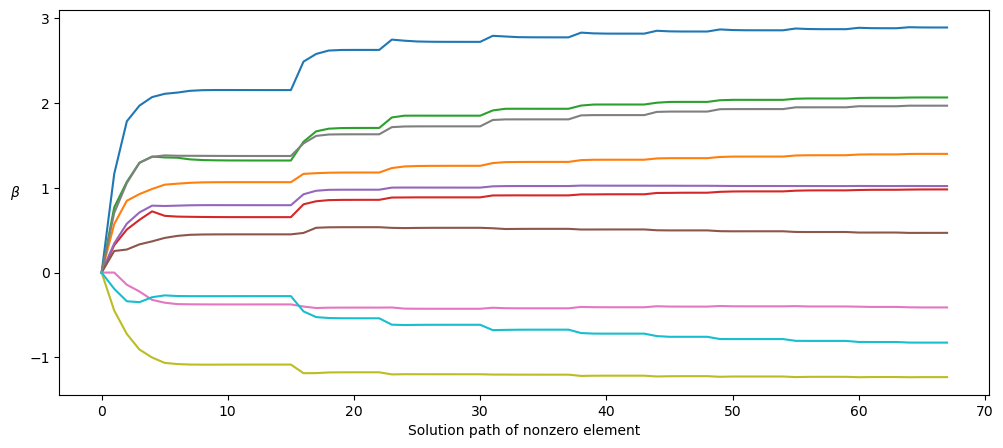

In [9]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_path[:,[0, 1, 4, 9,12,18,25,30,45,50]])
plt.xlabel('Solution path of nonzero element')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()